<a href="https://colab.research.google.com/github/kenltho2/Num-Meth23/blob/main/project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/Users/kenny/downloads/filmdeathcounts.csv')

In [ ]:
df

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating
0,24 Hour Party People,2002,7,R,Biography|Comedy|Drama|Music,Michael Winterbottom,117,7.3
1,28 Days Later,2002,53,R,Horror|Sci-Fi|Thriller,Danny Boyle,113,7.6
2,28 Weeks Later,2007,212,R,Horror|Sci-Fi|Thriller,Juan Carlos Fresnadillo,100,7.0
3,30 Days of Night,2007,67,R,Horror|Thriller,David Slade,113,6.6
4,300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7
...,...,...,...,...,...,...,...,...
540,Zatoichi,2003,81,R,Action|Comedy|Crime,Takeshi Kitano,116,7.6
541,Zodiac,2007,3,R,Crime|Drama|Mystery|Thriller,David Fincher,157,7.7
542,Zombieland,2009,109,R,Comedy|Horror,Ruben Fleischer,88,7.7
543,Zoolander,2001,4,PG-13,Comedy,Ben Stiller,89,6.5


In [ ]:
x = df[["Body_Count"]]

In [ ]:
y = df[["IMDB_Rating"]]

In [ ]:
table = pd.concat([x,y],axis=1)

In [ ]:
table['product'] = table.Body_Count * table.IMDB_Rating
table['x squared'] = table.Body_Count * table.Body_Count
table

,Body_Count,IMDB_Rating,product,x squared
0,7,7.3,51.1,49
1,53,7.6,402.8,2809
2,212,7.0,1484.0,44944
3,67,6.6,442.2,4489
4,600,7.7,4620.0,360000
...,...,...,...,...
540,81,7.6,615.6,6561
541,3,7.7,23.1,9
542,109,7.7,839.3,11881
543,4,6.5,26.0,16


In [ ]:
# formula for our coefficient a_1 
#(n (sum of products) - product of sums )/ n(sum of xsquares) - square of xsums

n = len(table)
sum_x = table['Body_Count'].sum()
sum_y = table['IMDB_Rating'].sum()
sum_xy = table['product'].sum()
sum_xsquared = table['x squared'].sum()

a_1 = ((n * sum_xy) * - sum_x * sum_y) / ((n * sum_xsquared) - (sum_x)**2)
a_1

-8552452.486051874

In [ ]:
# formula for our coefficient a_0
# sum of y / n - a_1 (sum of x / n)
a_0 = (sum_y / n) - a_1 * (sum_x / n)
a_0 

616765217.953939

**We have found our linear function modeling the regression between the amount of people perishing in a movie and its subsequent IMDB rating. $y = 6.168 \times 10^9 - (8.552 \times 10^7)x$ is our regression function (up to 4 significant digits).**

In [ ]:
#regression function
def linear_prediction(x_val):
    y_val = 616765217.953939 -8552452.486051874 * x_val
    return y_val

In [ ]:
table['error']= table.Body_Count - linear_prediction(table.Body_Count)
table['error^2'] = table.error * table.error
table

,Body_Count,IMDB_Rating,product,x squared,error,error^2
0,7,7.3,51.1,49,-5.568980e+08,3.101354e+17
1,53,7.6,402.8,2809,-1.634852e+08,2.672741e+16
2,212,7.0,1484.0,44944,1.196355e+09,1.431265e+18
3,67,6.6,442.2,4489,-4.375083e+07,1.914136e+15
4,600,7.7,4620.0,360000,4.514707e+09,2.038258e+19
...,...,...,...,...,...,...
540,81,7.6,615.6,6561,7.598351e+07,5.773494e+15
541,3,7.7,23.1,9,-5.911079e+08,3.494085e+17
542,109,7.7,839.3,11881,3.154522e+08,9.951010e+16
543,4,6.5,26.0,16,-5.825554e+08,3.393708e+17


In [ ]:
table['error^2'].sum()

3.4141593935259166e+20

**We find our sum of the squared residual to be $\sum_{i=1}^{n} E_{i}^2 = 3.414 \times 10^{20} $.**

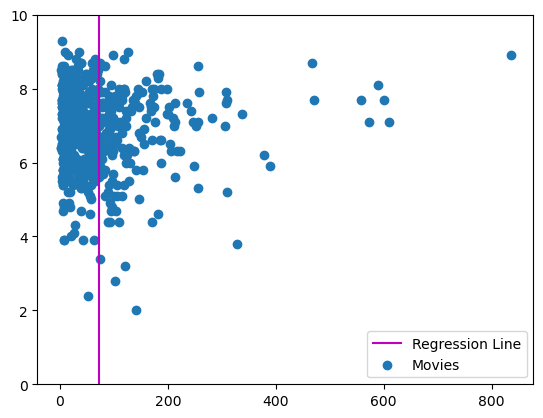

In [ ]:
x_space = np.arange(0,836)
y_space = linear_prediction(x_space)
plt.ylim(0,10)
plt.plot(x_space,y_space,'m',label="Regression Line")
plt.scatter(x,y,label='Movies')
plt.legend()
plt.show()